In [102]:
# Import Data
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import mplcursors
import numpy as np 
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator
bond_price = pd.read_csv("data/BondPrice.csv")
bond_quant = pd.read_csv("data/BondQuant.csv") 

In [103]:
# Six Percent Loan of 1812 
# L1: 20048 
# Price history
six_percent_prices = bond_price[bond_price["L1 ID"] == 20048] 
six_percent_quant = bond_quant[bond_quant["L1 ID"] == 20048] 
# Drop columns with NaN 
clean_six_percent_prices = six_percent_prices.dropna(axis=1) 

subset_cols = six_percent_quant.columns[2:] 
temp_clean_six_percent_quant = six_percent_quant.dropna(how="all", subset=subset_cols).dropna(axis=1)
# print(clean_six_percent_prices)
print(temp_clean_six_percent_quant)

# Define the threshold
threshold = 0.001
# Function to check if all values in a column are close to zero
def is_close_to_zero(col, threshold):
    return np.all(np.abs(col) < threshold)

cols_to_drop = [col for col in temp_clean_six_percent_quant.iloc[:, 2:].columns if is_close_to_zero(temp_clean_six_percent_quant[col], threshold)]

# Drop the columns
clean_six_percent_quant = temp_clean_six_percent_quant.drop(columns=cols_to_drop)
print(clean_six_percent_quant) 

     L1 ID              Series  1812-06-30  1812-09-30  1812-12-31  \
238  20048  Active Outstanding   2977912.5   5434712.5   7792000.0   
241  20048     Public Holdings   2977912.5   5434712.5   7792000.0   
242  20048   Total Outstanding   2977912.5   5434712.5   7792000.0   

     1813-03-31  1813-06-30  1813-09-30  1813-12-31  1814-03-31  ...  \
238   7710500.0   7710500.0   7710500.0   7710500.0   7710500.0  ...   
241   7710500.0   7710500.0   7710500.0   7710500.0   7710500.0  ...   
242   7710500.0   7710500.0   7710500.0   7710500.0   7710500.0  ...   

       1837-09-30    1837-12-31    1838-03-31    1838-06-30    1838-09-30  \
238 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10   
241 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10   
242 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10 -9.313226e-10   

       1838-12-31    1839-03-31    1839-06-30    1839-09-30    1839-12-31  
238 -9.313226e-10 -9.313226e-10 -9.313226e-10

In [104]:
# Reformat dataframe 
six_percent_prices_melted = clean_six_percent_prices.melt(var_name='Timestamp', value_name='Price')
six_percent_prices_melted = six_percent_prices_melted.iloc[2:].reset_index(drop=True)
# print(six_percent_prices_melted)

# Bond quantities 
active_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Active Outstanding"].melt(var_name='Timestamp', value_name='Quant')
active_outstanding = active_outstanding.iloc[2:].reset_index(drop=True)
print(active_outstanding)

public_holdings = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Public Holdings"].melt(var_name='Timestamp', value_name='Quant')
public_holdings = public_holdings.iloc[2:].reset_index(drop=True)
print(public_holdings)

total_outstanding = clean_six_percent_quant[clean_six_percent_quant["Series"] == "Total Outstanding"].melt(var_name='Timestamp', value_name='Quant')
total_outstanding = total_outstanding.iloc[2:].reset_index(drop=True)
print(total_outstanding)

     Timestamp      Quant
0   1812-06-30  2977912.5
1   1812-09-30  5434712.5
2   1812-12-31  7792000.0
3   1813-03-31  7710500.0
4   1813-06-30  7710500.0
..         ...        ...
78  1831-12-31      500.0
79  1832-03-31      500.0
80  1832-06-30      500.0
81  1832-09-30      500.0
82  1832-12-31      500.0

[83 rows x 2 columns]
     Timestamp      Quant
0   1812-06-30  2977912.5
1   1812-09-30  5434712.5
2   1812-12-31  7792000.0
3   1813-03-31  7710500.0
4   1813-06-30  7710500.0
..         ...        ...
78  1831-12-31      500.0
79  1832-03-31      500.0
80  1832-06-30      500.0
81  1832-09-30      500.0
82  1832-12-31      500.0

[83 rows x 2 columns]
     Timestamp      Quant
0   1812-06-30  2977912.5
1   1812-09-30  5434712.5
2   1812-12-31  7792000.0
3   1813-03-31  7710500.0
4   1813-06-30  7710500.0
..         ...        ...
78  1831-12-31      500.0
79  1832-03-31      500.0
80  1832-06-30      500.0
81  1832-09-30      500.0
82  1832-12-31      500.0

[83 rows x 2 colu

How was the debt marketed? 

Who bought the debt? 


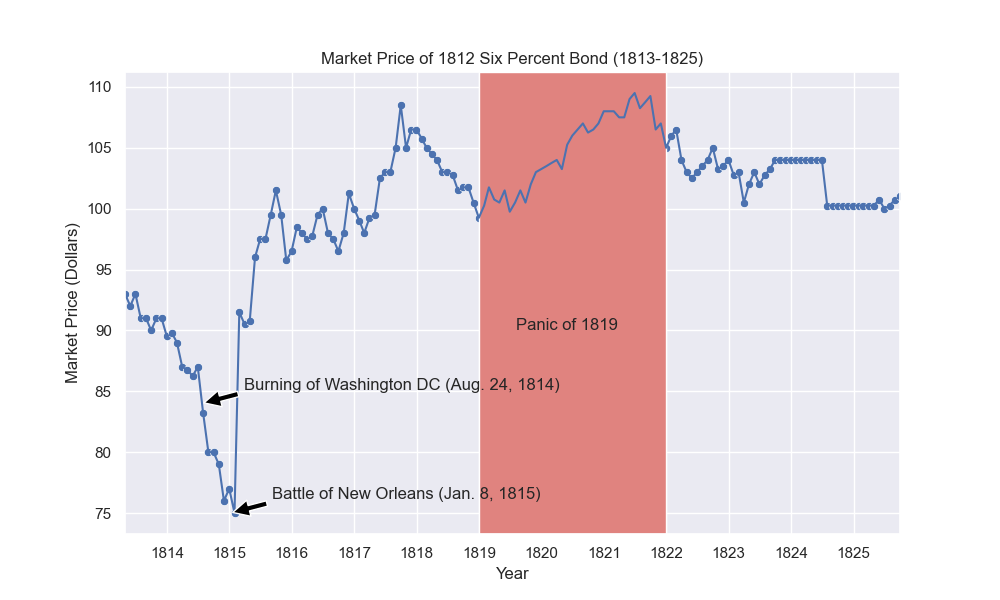

In [105]:
%matplotlib widget
# Graph dataframe 
six_percent_prices_melted['Timestamp'] = pd.to_datetime(six_percent_prices_melted['Timestamp'])

# Set up Seaborn plot
fig, ax = plt.subplots(figsize=(10, 6))
#ax.plot(six_percent_prices_melted['Timestamp'], six_percent_prices_melted['Price'])
#dots = ax.scatter(x, y, color='none')
scatplot = sns.scatterplot(data=six_percent_prices_melted, x='Timestamp', y='Price', marker='o')
scatplot.axvspan(xmin=pd.Timestamp("1819"), xmax=pd.Timestamp("1822"), fc="#E0837F")

# Format x-axis ticks to show year 
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_locator(MonthLocator(interval=4))

# Get the minimum and maximum dates with data (assuming 'date' is a datetime type)
min_date = six_percent_prices_melted['Timestamp'].min()
max_date = six_percent_prices_melted['Timestamp'].max()

# Set the x-axis limits to exclude extra years
plt.xlim(min_date, max_date)

# Enhance plot aesthetics (optional)
plt.xlabel('Year')
plt.ylabel('Market Price (Dollars)')
plt.title('Market Price of 1812 Six Percent Bond (1813-1825)')
plt.grid(True)

# Add hovering features 
def show_hover_panel(get_text_func=None):
    cursor = mplcursors.cursor(
        scatplot, 
        hover=2,  # Transient
        annotation_kwargs=dict(
            bbox=dict(
                boxstyle="square,pad=0.5",
                facecolor="white",
                edgecolor="#ddd",
                linewidth=0.5,
                path_effects=[pe.withSimplePatchShadow(offset=(1.5, -1.5))],
            ),
            linespacing=1.5,
            arrowprops=None,
        ),
        highlight=True,
        highlight_kwargs=dict(linewidth=2),
    )

    if get_text_func:
        cursor.connect(
            event="add",
            func=lambda sel: sel.annotation.set_text(get_text_func(sel.index)),
        )

    return cursor


def on_add(index):
    item = six_percent_prices_melted.iloc[index]
    parts = [
        f"Date: {item.Timestamp.strftime('%Y-%m-%d')}",
        f"Price: {item.Price:,.2f}",
    ]

    return "\n".join(parts)


show_hover_panel(on_add)

ax.text(pd.Timestamp("1820-06"), 90, 'Panic of 1819', horizontalalignment='center')

ax.annotate('Burning of Washington DC (Aug. 24, 1814)',
            xy=(pd.Timestamp("1814-7-24"), 84), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('Battle of New Orleans (Jan. 8, 1815)',
            xy=(pd.Timestamp("1815-1-08"), 75), xycoords='data',
            xytext=(30, 10), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.plot(six_percent_prices_melted['Timestamp'], six_percent_prices_melted['Price'])

plt.show()

#TODO
# Add some arrows pointing to some historical events 
# Add interactive elements - dragger 

True


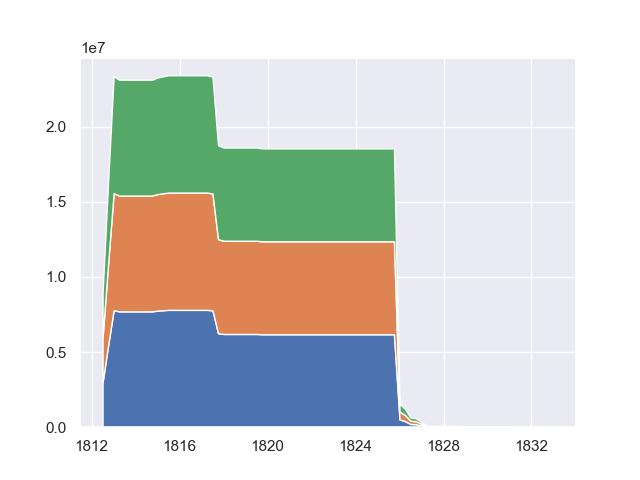

In [113]:
# Graph bond quantities 
#set seaborn style 
sns.set_theme() 
plt.close()
#create area chart 
x_timestamps = total_outstanding["Timestamp"] 
x_timestamps = pd.to_datetime(x_timestamps)
y1_active_outstanding = active_outstanding["Quant"].astype(float)
y2_total_outstanding = total_outstanding["Quant"].astype(float)
y3_public_holdings = public_holdings["Quant"].astype(float)
print(y1_active_outstanding.equals(y3_public_holdings))
# print(y2_total_outstanding) 

plt.stackplot(x_timestamps, y1_active_outstanding, 
              y1_active_outstanding, y1_active_outstanding)
plt.show()

<class 'pandas.core.series.Series'>


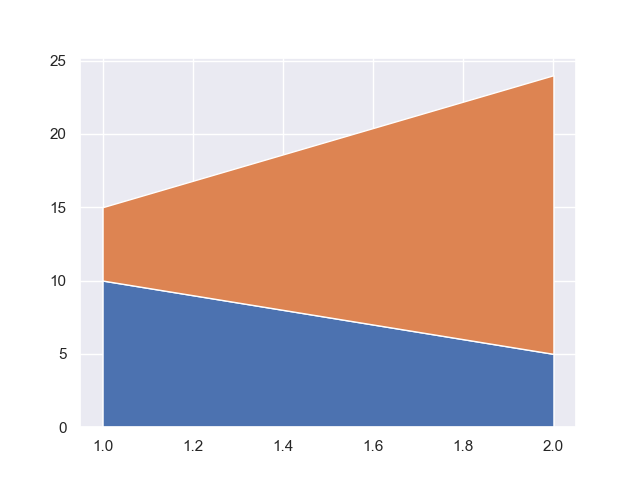

In [108]:
sns.set_theme() 
plt.close()
  
#define DataFrame 
data = {'period': [1, 2], 
                   'rohit': [10, 5], 
                   'vikey': [5, 19], 
                   } 
  
df = pd.DataFrame(data) 
print(type(df.rohit))
  
#create area chart 
plt.stackplot(df.period, df.rohit, df.vikey, 
              labels=['rohit', 'vikey'])

plt.show()

In [ ]:
total